# HDD FAILURE PREDICTION USING LSTM
# SUBMITTED BY 
# DANIEL IHOTU ABUTU
# MSC DATA SCIENCE AND ARTIFICIAL INTELLIGENCE
# JAN 2023 TO MAY 2024

# PROJECT AIM
This project aims to design a deep LSTM to predict failures in HDD using time series analysis

# The artefact follows these steps
1) EDA
2) Define functions for Exploratory data analysis
3) Data preprocessing
4) Fix date gaps
5) Creating failed and normal sequence
6) Creating functions for sequence length and lookahead days
7) Data normalisation
8) Data balancing
9) Converting data to sequence
10) Building the model
11) Training the model
12) Evaluating the model on test data

In [1]:
# Import libraries that will be needed for the work
import pandas as pd
import numpy as np

import sys
import glob
import os

import datetime
import time
import gc
import math
import random
from random import shuffle, randrange

from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import *

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# READING IN OUR FILE INTO OUR ENVIRONMENT
file_directory = '/Users/danielabutu/Desktop/HDD journals/data_Q1_2023' #we will save our preprocessed file in this directory later
csv_train_file =  'Q1-Q3_data copy.csv'
csv_test_file = 'new_Q4_data copy.csv'

In [3]:
print('Reading training data set.........')
df = pd.read_csv(csv_train_file)
print('Finished reading training data set')

df.head()

Reading training data set.........
Finished reading training data set


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2020-01-01,Z305B2QN,ST4000DM000,4000787030016,0,117.0,162984112.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,75.0,31653264.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,83.0,185532176.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,83.0,178141640.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,143.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)

(37655263, 131)


In [5]:
print(df.describe())

       capacity_bytes       failure  smart_1_normalized   smart_1_raw  \
count    3.765526e+07  3.765526e+07        3.762306e+07  3.762306e+07   
mean     9.086261e+12  2.897337e-05        9.125451e+01  8.606139e+07   
std      3.702339e+12  5.382614e-03        1.461503e+01  8.139624e+07   
min     -1.000000e+00  0.000000e+00        2.900000e+01  0.000000e+00   
25%      4.000787e+12  0.000000e+00        8.100000e+01  0.000000e+00   
50%      1.200014e+13  0.000000e+00        8.300000e+01  7.081276e+07   
75%      1.200014e+13  0.000000e+00        1.000000e+02  1.581394e+08   
max      1.800021e+13  1.000000e+00        2.000000e+02  2.416802e+09   

       smart_2_normalized   smart_2_raw  smart_3_normalized   smart_3_raw  \
count        1.090545e+07  1.090545e+07        3.746611e+07  3.746611e+07   
mean         1.209102e+02  5.790692e+01        9.789168e+01  5.589029e+02   
std          2.174146e+01  5.021430e+01        1.490439e+01  1.882717e+03   
min          8.600000e+01  0.00000

In [6]:
# let's review the available hard drive models and select one with lot of samples for the training data
print(df.model.value_counts())

model
ST12000NM0007                             9632628
ST4000DM000                               5237445
ST8000NM0055                              3960858
ST12000NM0008                             3587951
HGST HMS5C4040BLE640                      3491059
HGST HUH721212ALN604                      2971850
ST8000DM002                               2684455
TOSHIBA MG07ACA14TA                       2310386
HGST HMS5C4040ALE640                       801930
ST12000NM001G                              685622
HGST HUH721212ALE600                       581088
ST10000NM0086                              328796
HGST HUH728080ALE600                       274702
ST6000DX000                                242763
ST500LM012 HN                              129003
TOSHIBA MQ01ABF050                         110669
TOSHIBA MQ01ABF050M                        110346
Seagate BarraCuda SSD ZA250CM10002         102949
HGST HUH721212ALE604                        67002
ST500LM030                                  

In [8]:
# READING OUR TEST DATA
print('Reading test data set.........')
df2 = pd.read_csv(csv_test_file) # reading our test data
print('Finished reading test data set')

Reading test data set.........
Finished reading test data set


In [9]:
#Lets check the available models in our test data
print(df2.model.value_counts()) 

model
ST12000NM0007                             2314675
TOSHIBA MG07ACA14TA                       1793437
ST4000DM000                               1746025
ST12000NM0008                             1741198
ST8000NM0055                              1325932
HGST HMS5C4040BLE640                      1171990
HGST HUH721212ALN604                       996625
ST8000DM002                                900333
ST12000NM001G                              610527
ST14000NM001G                              432970
HGST HMS5C4040ALE640                       281844
HGST HUH721212ALE600                       239184
WDC WUH721414ALE6L4                        229861
HGST HUH721212ALE604                       208777
ST10000NM0086                              110451
HGST HUH728080ALE600                        97298
ST6000DX000                                 81512
Seagate BarraCuda SSD ZA250CM10002          51195
ST500LM012 HN                               41907
TOSHIBA MQ01ABF050M                         

In [10]:
print(df2.shape)

(14631135, 149)


In [11]:
df2

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2020-10-01,ZLW0EGC6,ST12000NM001G,12000138625024,0,84.0,227296296.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,Z305B2QN,ST4000DM000,4000787030016,0,110.0,27060600.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,214987616.0,NaN,NaN,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,82.0,155222208.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-01,20H0A0CXF97G,TOSHIBA MG07ACA14TA,14000519643136,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631130,2020-12-31,ZJV2ESXT,ST12000NM0007,12000138625024,0,80.0,108682728.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14631131,2020-12-31,ZA13ZBCT,ST8000DM002,8001563222016,0,82.0,152003088.0,NaN,NaN,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14631132,2020-12-31,PL1331LAHGD9NH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,134.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14631133,2020-12-31,PL2331LAHDS4TJ,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,133.0,104.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 2020 Annual Failure Rate (AFR) statistics revealed that among various data centre models, the ST4000DM000, ST12000NM0007 and ST8000DM0055 experienced the highest number of failures. So we are focusing only on those model.

In [12]:
# Lets select only the drive we want out of all the HDD. You can change it to the three HDD model we are working with 
#ST4000DM000, ST12000NM0007 and ST8000DM0055
harddrive_model = 'ST4000DM000'

# keep only the selected hard drive model we want in our training data set
df = df[df.model == harddrive_model]

# Lets assign our test variable and pre-selected model
df_t = df2
# keep only the selected hard drive model we want in our test data set
df_t = df_t[df_t.model == harddrive_model]

In [26]:
#converting string to date time format for sorting and plotting time series data 
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df_t['date'] = pd.to_datetime(df_t['date'], format='%Y-%m-%d', errors='coerce')

In [27]:
print(df['date'].dtype)
print(df_t['date'].dtype)

datetime64[ns]
datetime64[ns]


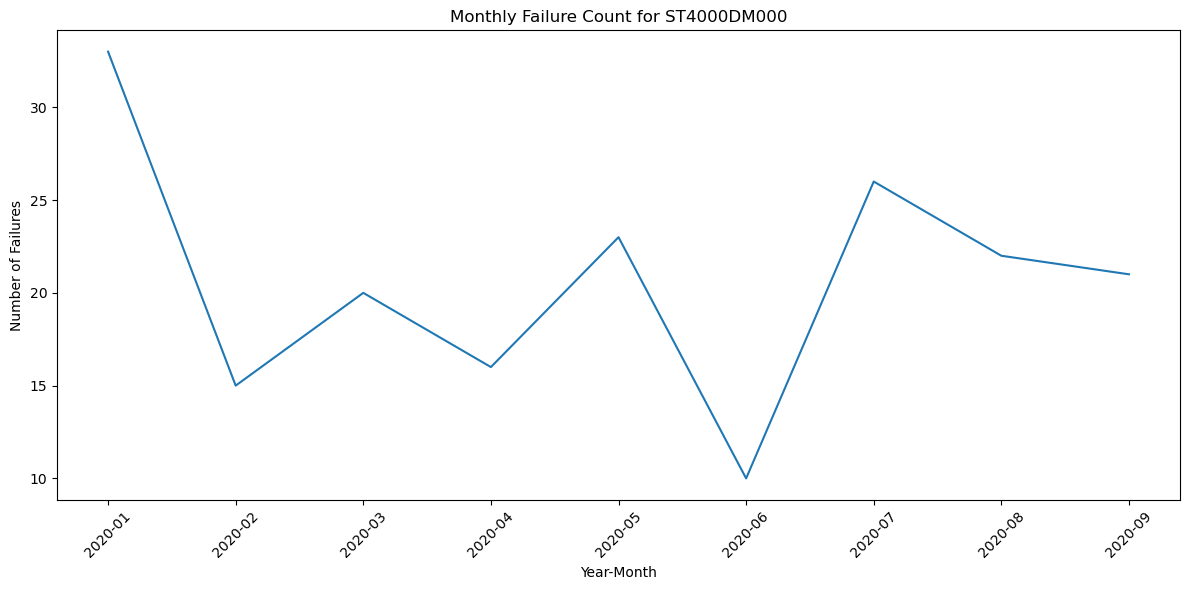

In [28]:
#Lets plot to see the monthly failure for the selected model
#  #Aggregating failures by month
df['year_month'] = df['date'].dt.to_period('M')
failures_by_month = df[df['failure'] == 1].groupby('year_month').size().reset_index(name='failures')
failures_by_month['year_month'] = failures_by_month['year_month'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=failures_by_month, x='year_month', y='failures')
plt.xticks(rotation=45)
plt.title('Monthly Failure Count for ST4000DM000') # please change it to the selected model
plt.xlabel('Year-Month')
plt.ylabel('Number of Failures')
plt.tight_layout()
plt.show()

The functions below are used for monitoring, visualize and analyze our data from different perspectives. 
To also differentiate between normal and failure conditions of HDDs. we also use random colors and distinguishing plot styles to visually segregate and analyze these conditions effectively.

In [29]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_df(df,loc_col_list,axs):   
    df_normal = df[df['failure']==0]
    df_failed = df[df['failure']==1]
    
    n_rows = len(loc_col_list)
    cmap = get_cmap(n_rows) 
    color_list = random.sample(range(n_rows),n_rows)
    
    for i, cur_col in enumerate(loc_col_list):
        cur_min = df[cur_col].min() 
        cur_max = df[cur_col].max()
        
        axs[i].plot(df_normal['date'], df_normal[cur_col],'.', color=cmap(color_list[i]), markersize=5,alpha=0.2)
        axs[i].plot(df_failed['date'], df_failed[cur_col],'.', color=cmap(color_list[i]), markersize=20,alpha=0.6)
        axs[i].set_ylabel(cur_col)

In [30]:
def remove_constant_values(df, check_str): 
    col_list = df.columns.tolist()
    loc_col_list = [] 
    
    print("Range for    : {:>25s} {:>15s}".format("min","max"))
    
    for cur_col in col_list:
        if check_str in cur_col:
            cur_min = df[cur_col].min() 
            cur_max = df[cur_col].max()

            # Check if cur_min or cur_max is NaN
            if pd.isna(cur_min) or pd.isna(cur_max):
                print(f"  {cur_col:20s} contains NaN values")
                continue  # Skip this column for printing but consider it for further analysis if needed

            if cur_min != cur_max : 
                print("  {:20s}   {:15d} {:15d} ".format(cur_col,int(cur_min),int(cur_max)))
                loc_col_list.append(cur_col)
                
    print("")
    return loc_col_list 


While building any machine learning/deep learning model, it is important to understand the quality and structure of the input data. For example, there can be missing data for several days for some of the sensors in our data. There can also be sensors which do not have any data. The input data needs to be curated to remove such sensors and adjust the data for the sensors with missing values.

In [31]:
# First, let's remove columns that have no valid data
df = df.dropna(axis='columns', how='all') 
# Next, let's remove a few rows that had invalid data (most likely error reading SMART statistics)
df = df.dropna(axis='rows', how='any')

df_failed = df[df['failure']==1]
df_normal = df[df['failure']==0]

col_list_raw = remove_constant_values(df_failed,"_raw")
col_list_normalized = remove_constant_values(df_failed,"_normalized")
col_list = ['date', 'serial_number', 'model', 'capacity_bytes', 'failure'] 
col_list = col_list + col_list_raw + col_list_normalized

df = df[col_list]

#keep the same columns as the training dataframe 
df_t = df_t[col_list]

#fill in the small number of null values in remaining columns 
df = df.fillna(0)
df_t = df_t.fillna(0)

Range for    :                       min             max
  smart_1_raw                    1989904       243590976 
  smart_4_raw                          1              53 
  smart_5_raw                          0           64704 
  smart_7_raw                    5572600   1662247531290 
  smart_9_raw                      24032           48434 
  smart_12_raw                         1              52 
  smart_183_raw                        0             720 
  smart_184_raw                        0              17 
  smart_187_raw                        0             402 
  smart_188_raw                        0             129 
  smart_190_raw                       17              34 
  smart_192_raw                        0              21 
  smart_193_raw                      200          234334 
  smart_194_raw                       17              34 
  smart_197_raw                        0           21376 
  smart_198_raw                        0           21376 
  smart_199_raw

In [32]:
# collecting the number of failed hard disks to compare the distributions of the sensor data with normal disks and also to plot time series data 

serial_num_list_failed = df_failed.serial_number.value_counts().index.tolist()

# Histogram of sensor data
Once the data is curated, a typical histogram plot of the data can reveal key operating points, outliers and provide further suggestions for preparing the data. The raw SMART sensor data is plotted below.

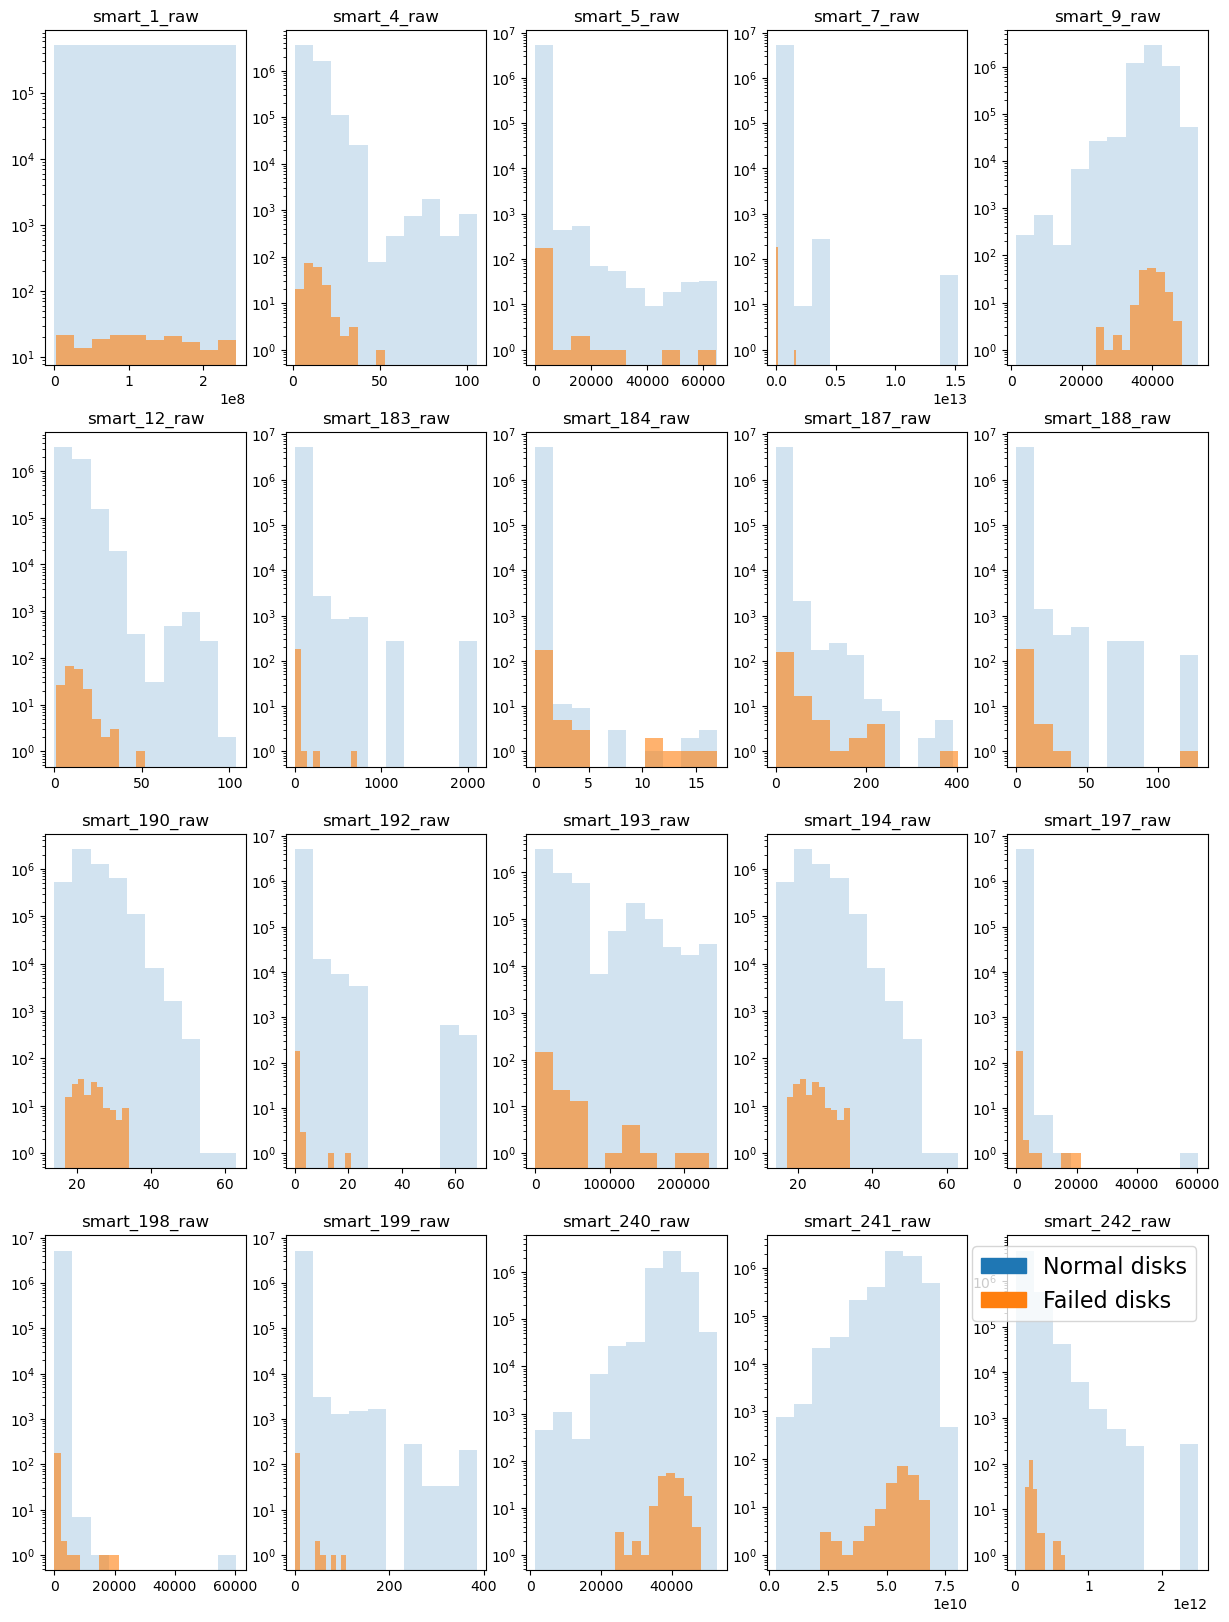

In [33]:
n = 5
m = len(col_list_raw) // n
if len(col_list_raw) % n > 0:
    m += 1

fig, axs = plt.subplots(figsize=(15, 20), ncols=n, nrows=m)
axs = axs.flatten()

for i, cur_col in enumerate(col_list_raw):
    axs[i].hist(df_normal[cur_col], alpha=0.2, color="tab:blue")
    axs[i].hist(df_failed[cur_col], alpha=0.6, color="tab:orange")
    axs[i].set_yscale('log')
    axs[i].set_title(cur_col)

for i in range(len(col_list_raw), len(axs)):
    axs[i].axis('off')

# Creating custom handles for the legend
import matplotlib.patches as mpatches
handle_normal = mpatches.Patch(color='tab:blue', label='Normal disks')
handle_failed = mpatches.Patch(color='tab:orange', label='Failed disks')

# Adding legend to the last subplot
axs[-1].legend(handles=[handle_normal, handle_failed], fontsize=16)

# Time series visualization
Of all the disks with available data, several disks fail. Since the SMART sensor data is time series, it is useful to visualize the sensor behavior for the failed disks. In the plots below, the raw sensor data are displayed for 10 failed disks out of all the failed disks in our data. This can give us insights to the behavior of the disk until the time of failure.

/var/folders/ml/xhm0_9jj5j93m6qcp12j_jb80000gn/T/ipykernel_44243/1992257863.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)
/var/folders/ml/xhm0_9jj5j93m6qcp12j_jb80000gn/T/ipykernel_44243/1992257863.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)
/var/folders/ml/xhm0_9jj5j93m6qcp12j_jb80000gn/T/ipykernel_44243/1992257863.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)
/

NOTE : 
    The large circles represent time of failure.
    The lines show the data leading up to the point


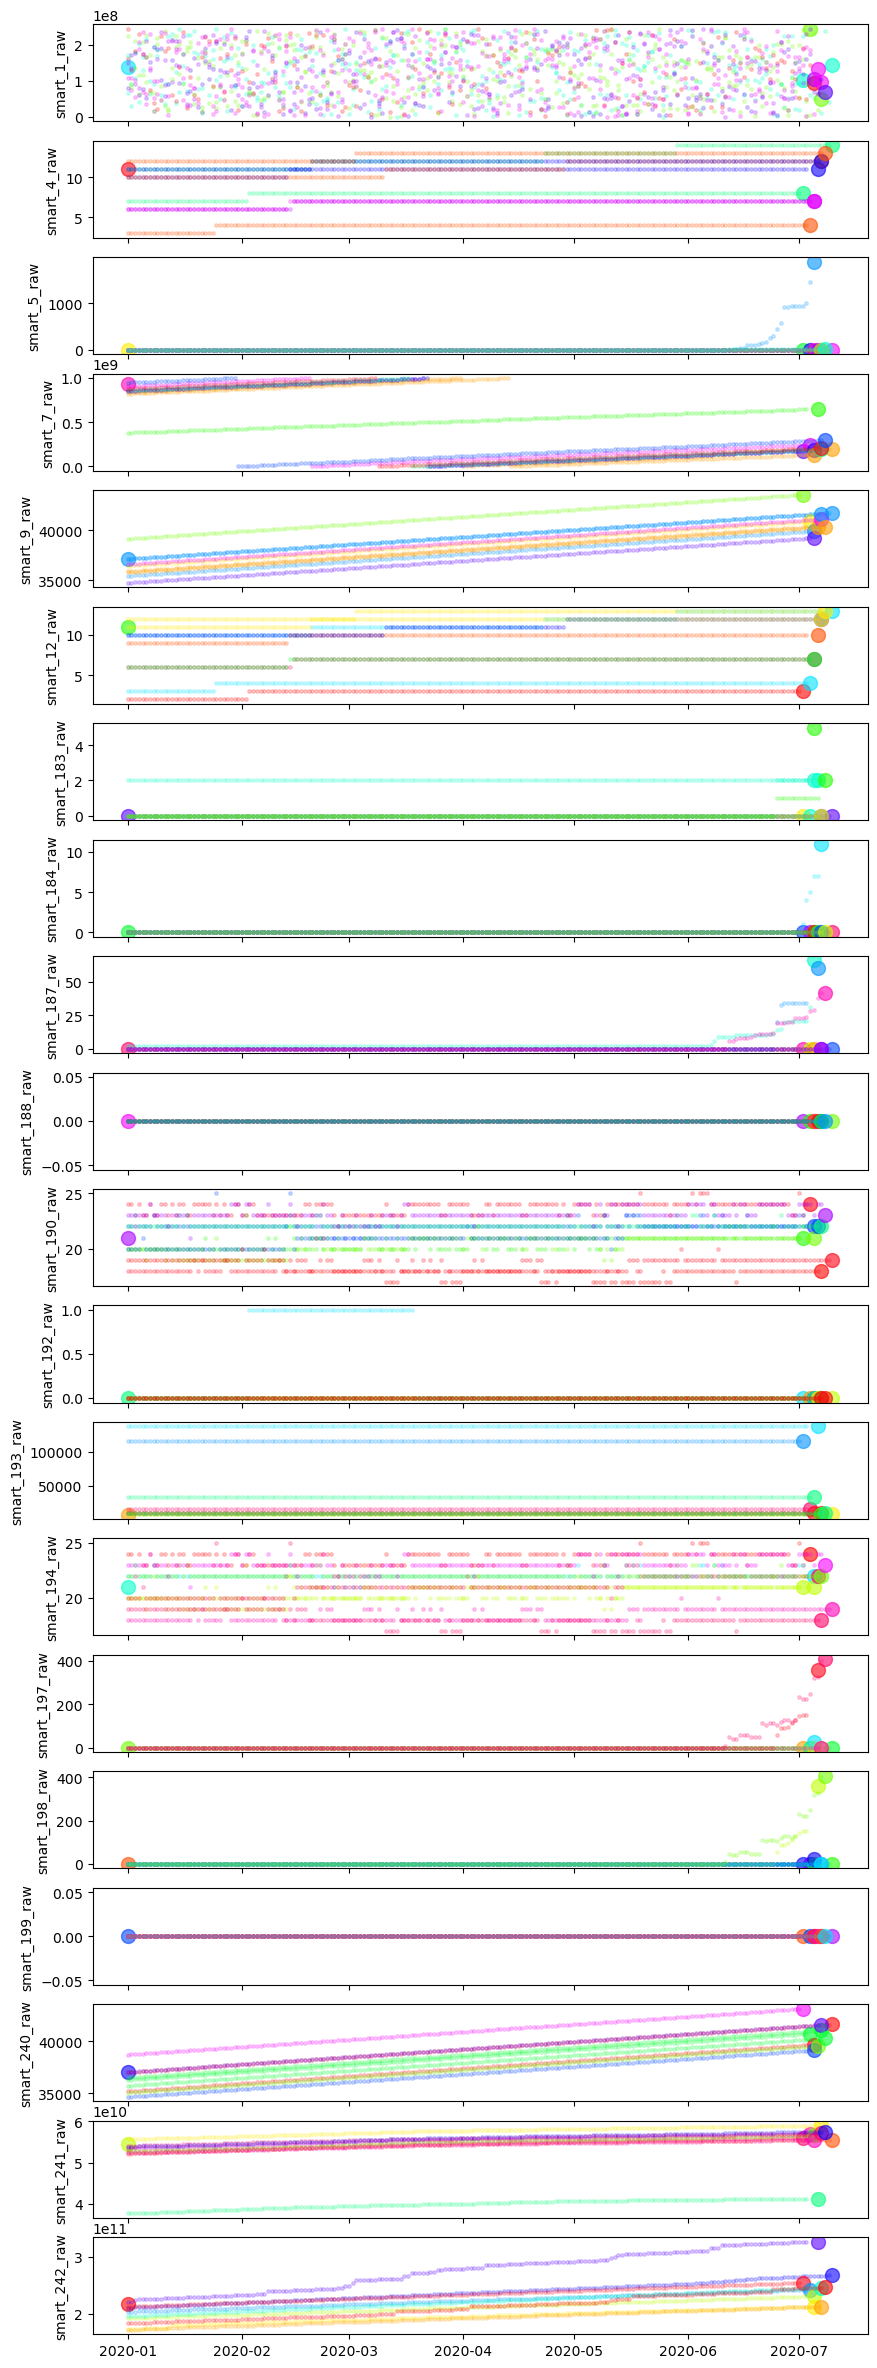

In [34]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


n_rows = len(col_list_raw)
fig, axs = plt.subplots(ncols=1, nrows=n_rows, 
                            figsize=(10,1.5*n_rows),sharex=True)
for cur_num in serial_num_list_failed[:10]: # [:1]: 
    plot_df(df[df['serial_number']==cur_num],col_list_raw,axs)

print("NOTE : \n    The large circles represent time of failure.\n    The lines show the data leading up to the point") 

In [35]:
# Save the preprocessed dataset as a CSV file
print('Saving the preprocessed test dataset as CSV...')
df.to_csv(os.path.join(file_directory, csv_train_file), index=False)# Save the testing dataset
df_t.to_csv(os.path.join(file_directory, csv_test_file), index=False)
print('Completed saving the preprocessed dataset')

Saving the preprocessed test dataset as CSV...
Completed saving the preprocessed dataset
